In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Load the CSV file
df = pd.read_csv('RTA Dataset.csv' ) 
print("# Data Loaded Successfully!\n")

# Data Loaded Successfully!



In [2]:
print(" Preview of Dataset:")
print(df.head(11))

 Preview of Dataset:
        Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0   17:02:00      Monday              18-30          Male   Above high school   
1   17:02:00      Monday              31-50          Male  Junior high school   
2   17:02:00      Monday              18-30          Male  Junior high school   
3    1:06:00      Sunday              18-30          Male  Junior high school   
4    1:06:00      Sunday              18-30          Male  Junior high school   
5   14:15:00      Friday              31-50          Male                 NaN   
6   17:30:00   Wednesday              18-30          Male  Junior high school   
7   17:20:00      Friday              18-30          Male  Junior high school   
8   17:20:00      Friday              18-30          Male  Junior high school   
9   17:20:00      Friday              18-30          Male  Junior high school   
10  14:40:00    Saturday              18-30          Male   Above high school   

   Veh

C:\Users\Neeraj\AppData\Local\Temp\ipykernel_10444\2287713037.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


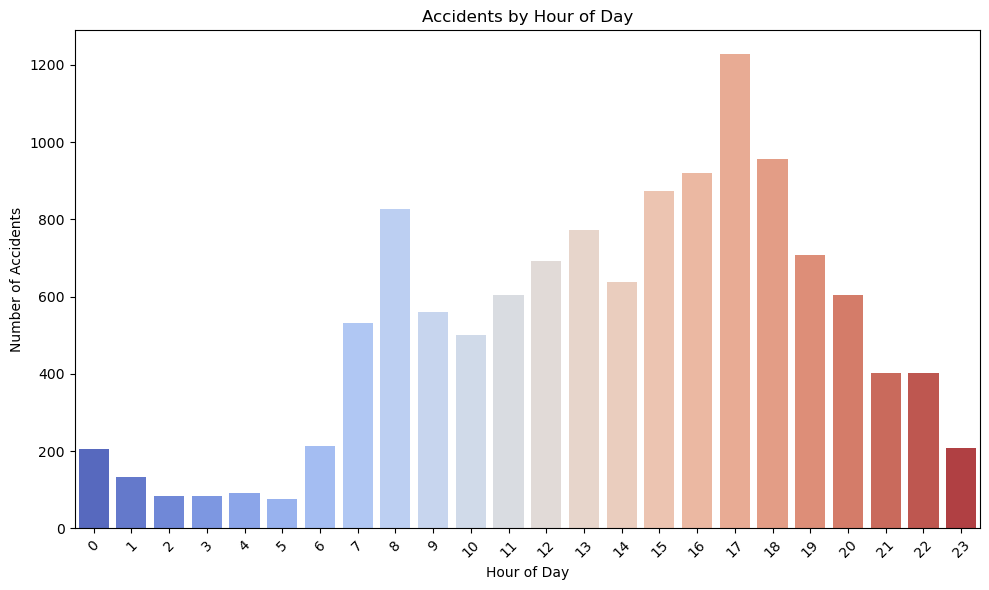

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load your dataset
df = pd.read_csv("RTA Dataset.csv")  # Replace with your actual filename

# --------- Preprocessing ---------
# Convert time to hour bins
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Drop rows with missing values in key columns for this analysis
df = df.dropna(subset=['Time', 'Day_of_week', 'Accident_severity'])

# Optional: Standardize categorical columns if needed
df['Accident_severity'] = df['Accident_severity'].str.strip()
df['Day_of_week'] = df['Day_of_week'].str.strip()

# --------- Analysis & Visualizations ---------

## 1. Accident Frequency by Time of Day
plt.figure(figsize=(10, 6))
sns.countplot(x='Time', data=df, palette='coolwarm')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




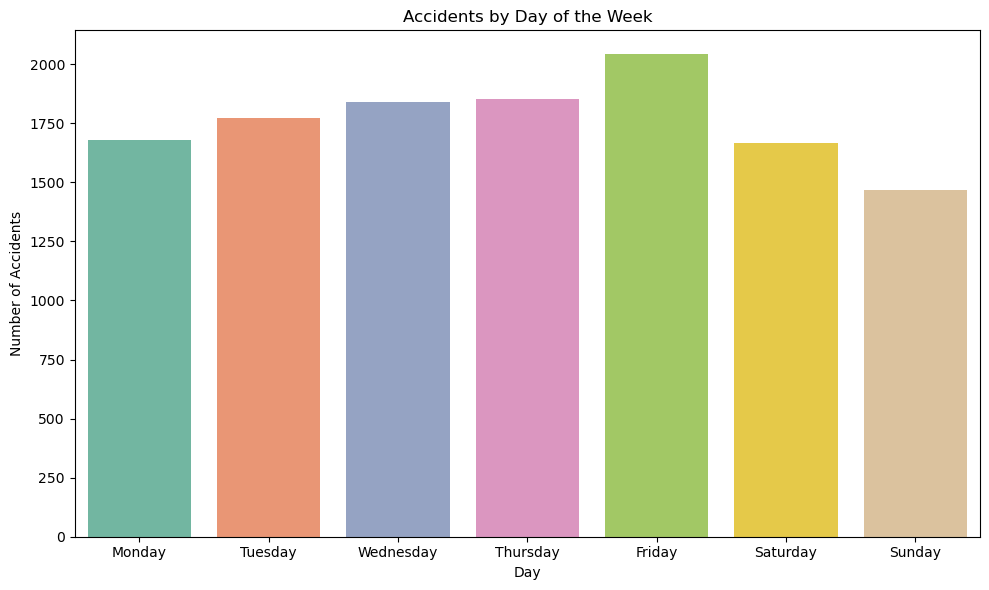

In [5]:
## 2. Accidents by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_week', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Set2')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()



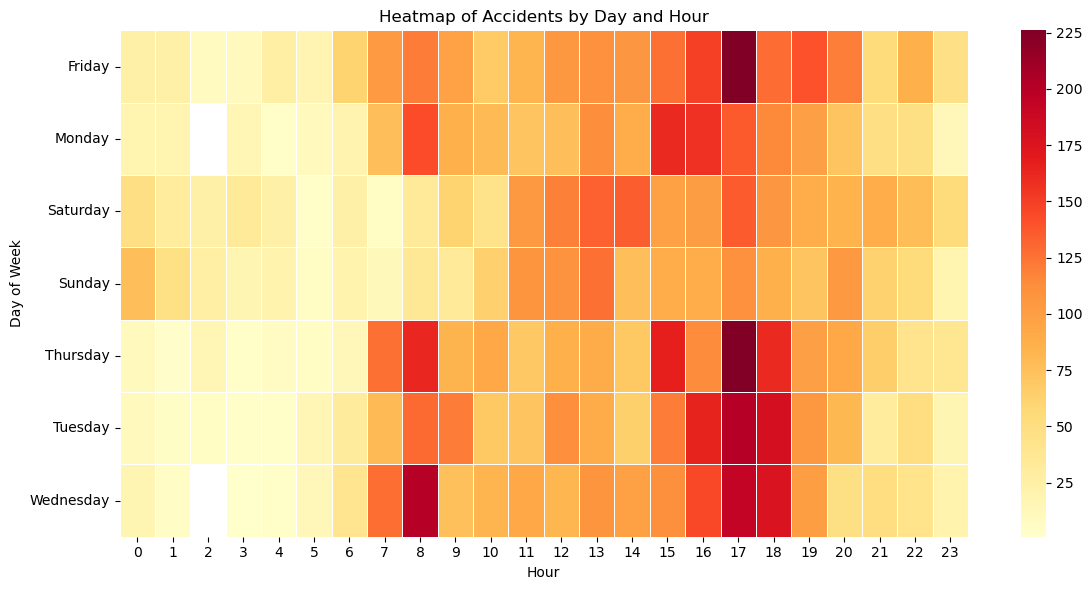

In [6]:
## 3. Heatmap of Accidents by Day and Time
heatmap_data = df.groupby(['Day_of_week', 'Time']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5)
plt.title("Heatmap of Accidents by Day and Hour")
plt.xlabel("Hour")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()



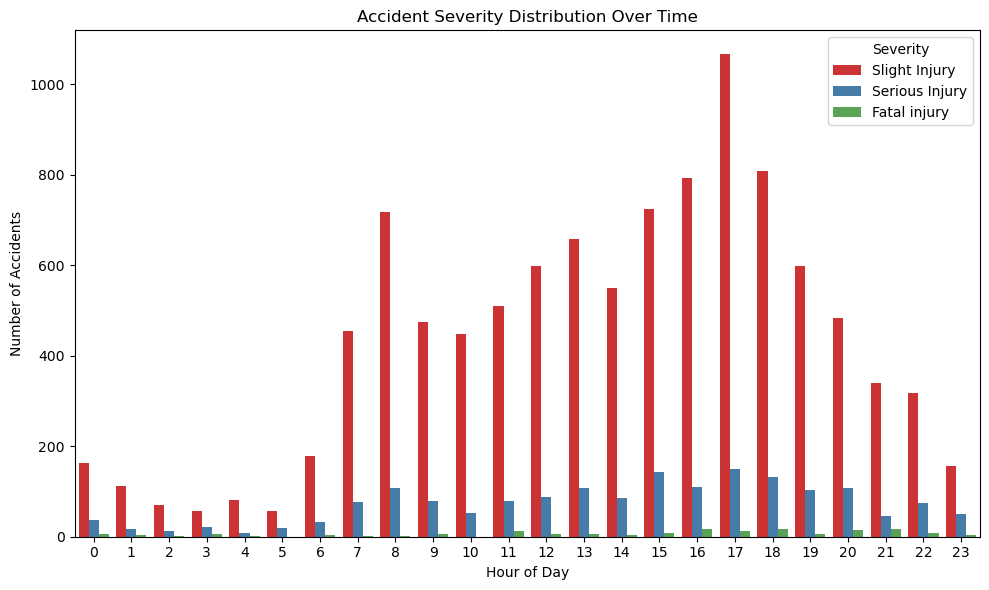

In [7]:
## 4. Accident Severity vs Time of Day
plt.figure(figsize=(10, 6))
sns.countplot(x='Time', hue='Accident_severity', data=df, palette='Set1')
plt.title("Accident Severity Distribution Over Time")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.legend(title='Severity')
plt.tight_layout()
plt.show()



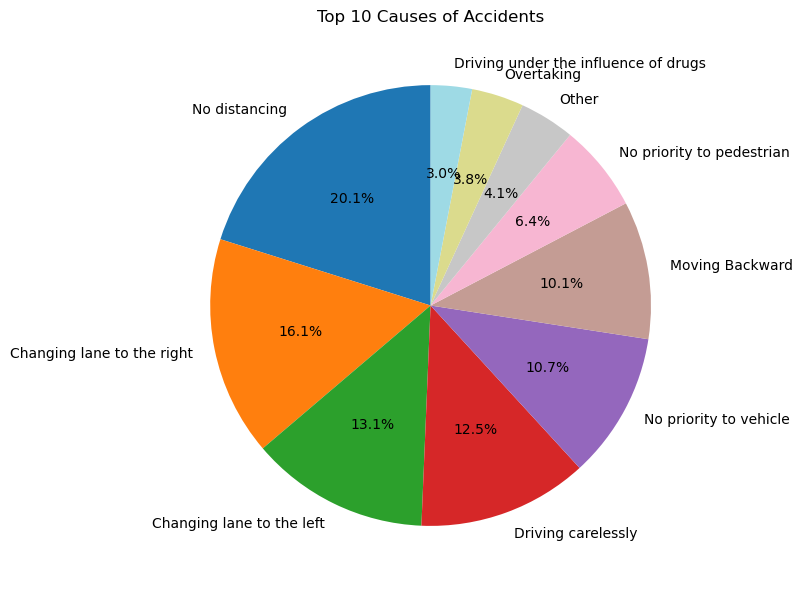

In [8]:
## 5. Pie Chart: Contributing Factors (Cause_of_accident)
cause_counts = df['Cause_of_accident'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
cause_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title("Top 10 Causes of Accidents")
plt.ylabel("")
plt.tight_layout()
plt.show()

